# Red Wine Quality Classification with Tensorflow and Keras

In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
# Online database
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=';')

In [ ]:
# Local database (directory csv)
import pandas as pd
name = 'csv/winequality-red.csv'
dataOff = pd.read_csv(url, sep=';')

In [5]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [53]:
columns = data.columns

columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [54]:
# Null data
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Descriptive statistics

In [55]:
data_stats = data.describe()

data_stats.pop("quality")

# Transposed Matrix
data_stats = data_stats.transpose()

data_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## Functions (Transform data)

In [56]:
# Stardardization
def normStandard(x):
    return (x - data_stats['mean']) / data_stats['std']

# MinMax
def minMax(x):
    return (x - data_stats['min'])/(data_stats['max'] - data_stats['min'])

### Histogram

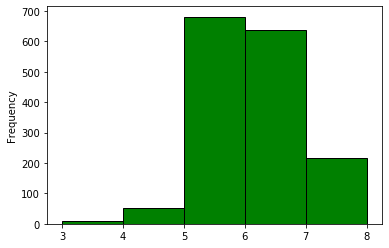

In [57]:
data['quality'].plot.hist(bins=5, color='green', edgecolor='black')

## Split the data into train and test

In [58]:
train_dataset = data.sample(frac=0.7,random_state=0)
test_dataset = data.drop(train_dataset.index)

## Split features from labels

In [59]:
train_labels = train_dataset.pop('quality')
test_labels = test_dataset.pop('quality')

In [60]:
train_labels

1109    6
1032    5
1002    7
487     6
979     5
       ..
640     5
104     5
815     5
998     6
1075    7
Name: quality, Length: 1119, dtype: int64

## Normalize the train data

In [61]:
normed_train_data = normStandard(train_dataset)
normed_test_data = normStandard(test_dataset)

## Build Model

In [78]:
# Callbacks
class myCallback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('mse') < 0.05):
            print("\nReached 0.05 mse so cancelling training!")
            self.model.stop_training = True

In [79]:
callbacks = myCallback()

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mae', 'mse'])
    
    return model
    

In [80]:
model = build_model()

In [81]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 65        
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [82]:
EPOCHS = 1000

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, callbacks=[callbacks])

Train on 1119 samples
Epoch 1/1000
1119/1119 [==============================] - 0s 342us/sample - loss: 16.0992 - mae: 3.7106 - mse: 16.0992
Epoch 2/1000
1119/1119 [==============================] - 0s 31us/sample - loss: 3.6036 - mae: 1.5700 - mse: 3.6036
Epoch 3/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 2.2020 - mae: 1.1778 - mse: 2.2020
Epoch 4/1000
1119/1119 [==============================] - 0s 31us/sample - loss: 1.6219 - mae: 1.0129 - mse: 1.6219
Epoch 5/1000
1119/1119 [==============================] - 0s 31us/sample - loss: 1.2945 - mae: 0.9017 - mse: 1.2945
Epoch 6/1000
1119/1119 [==============================] - 0s 31us/sample - loss: 1.0763 - mae: 0.8218 - mse: 1.0763
Epoch 7/1000
1119/1119 [==============================] - 0s 31us/sample - loss: 0.9133 - mae: 0.7560 - mse: 0.9133
Epoch 8/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 0.7978 - mae: 0.6993 - mse: 0.7978
Epoch 9/1000
1119/1119 [=======================

1119/1119 [==============================] - 0s 34us/sample - loss: 0.2398 - mae: 0.3735 - mse: 0.2398
Epoch 71/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.2309 - mae: 0.3690 - mse: 0.2309
Epoch 72/1000
1119/1119 [==============================] - 0s 31us/sample - loss: 0.2357 - mae: 0.3728 - mse: 0.2357
Epoch 73/1000
1119/1119 [==============================] - 0s 31us/sample - loss: 0.2336 - mae: 0.3701 - mse: 0.2336
Epoch 74/1000
1119/1119 [==============================] - 0s 30us/sample - loss: 0.2273 - mae: 0.3652 - mse: 0.2273
Epoch 75/1000
1119/1119 [==============================] - 0s 31us/sample - loss: 0.2274 - mae: 0.3649 - mse: 0.2274
Epoch 76/1000
1119/1119 [==============================] - 0s 31us/sample - loss: 0.2253 - mae: 0.3671 - mse: 0.2253
Epoch 77/1000
1119/1119 [==============================] - 0s 31us/sample - loss: 0.2206 - mae: 0.3638 - mse: 0.2206
Epoch 78/1000
1119/1119 [==============================] - 0s 31us/sample - lo

1119/1119 [==============================] - 0s 32us/sample - loss: 0.1685 - mae: 0.3125 - mse: 0.1685
Epoch 140/1000
1119/1119 [==============================] - 0s 34us/sample - loss: 0.1619 - mae: 0.3095 - mse: 0.1619
Epoch 141/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 0.1684 - mae: 0.3165 - mse: 0.1684
Epoch 142/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.1619 - mae: 0.3066 - mse: 0.1619
Epoch 143/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 0.1615 - mae: 0.3081 - mse: 0.1615
Epoch 144/1000
1119/1119 [==============================] - 0s 31us/sample - loss: 0.1654 - mae: 0.3115 - mse: 0.1654
Epoch 145/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.1636 - mae: 0.3083 - mse: 0.1636
Epoch 146/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.1586 - mae: 0.3037 - mse: 0.1586
Epoch 147/1000
1119/1119 [==============================] - 0s 33us/sam

1119/1119 [==============================] - 0s 34us/sample - loss: 0.1236 - mae: 0.2722 - mse: 0.1236
Epoch 209/1000
1119/1119 [==============================] - 0s 35us/sample - loss: 0.1326 - mae: 0.2802 - mse: 0.1326
Epoch 210/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 0.1248 - mae: 0.2747 - mse: 0.1248
Epoch 211/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.1302 - mae: 0.2746 - mse: 0.1302
Epoch 212/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.1284 - mae: 0.2728 - mse: 0.1284
Epoch 213/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 0.1253 - mae: 0.2672 - mse: 0.1253
Epoch 214/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.1282 - mae: 0.2735 - mse: 0.1282
Epoch 215/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.1208 - mae: 0.2639 - mse: 0.1208
Epoch 216/1000
1119/1119 [==============================] - 0s 33us/sam

1119/1119 [==============================] - 0s 32us/sample - loss: 0.1072 - mae: 0.2466 - mse: 0.1072
Epoch 278/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.1021 - mae: 0.2466 - mse: 0.1021
Epoch 279/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 0.1033 - mae: 0.2490 - mse: 0.1033
Epoch 280/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 0.1101 - mae: 0.2525 - mse: 0.1101
Epoch 281/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.0982 - mae: 0.2356 - mse: 0.0982
Epoch 282/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.0940 - mae: 0.2319 - mse: 0.0940
Epoch 283/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.1105 - mae: 0.2545 - mse: 0.1105
Epoch 284/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.0929 - mae: 0.2320 - mse: 0.0929
Epoch 285/1000
1119/1119 [==============================] - 0s 35us/sam

1119/1119 [==============================] - 0s 32us/sample - loss: 0.0885 - mae: 0.2227 - mse: 0.0885
Epoch 346/1000
1119/1119 [==============================] - 0s 34us/sample - loss: 0.0812 - mae: 0.2182 - mse: 0.0812
Epoch 347/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.0844 - mae: 0.2227 - mse: 0.0844
Epoch 348/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 0.0916 - mae: 0.2318 - mse: 0.0916
Epoch 349/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.0903 - mae: 0.2303 - mse: 0.0903
Epoch 350/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 0.0810 - mae: 0.2172 - mse: 0.0810
Epoch 351/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.0836 - mae: 0.2210 - mse: 0.0836
Epoch 352/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.0929 - mae: 0.2312 - mse: 0.0929
Epoch 353/1000
1119/1119 [==============================] - 0s 33us/sam

1119/1119 [==============================] - 0s 32us/sample - loss: 0.0782 - mae: 0.2099 - mse: 0.0782
Epoch 414/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 0.0804 - mae: 0.2198 - mse: 0.0804
Epoch 415/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.0747 - mae: 0.2018 - mse: 0.0747
Epoch 416/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 0.0755 - mae: 0.2107 - mse: 0.0755
Epoch 417/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.0776 - mae: 0.2163 - mse: 0.0776
Epoch 418/1000
1119/1119 [==============================] - ETA: 0s - loss: 0.0335 - mae: 0.1467 - mse: 0.033 - 0s 33us/sample - loss: 0.0765 - mae: 0.2106 - mse: 0.0765
Epoch 419/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 0.0683 - mae: 0.1982 - mse: 0.0683
Epoch 420/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.0812 - mae: 0.2104 - mse: 0.0812
Epoch 421/1000
1119

1119/1119 [==============================] - 0s 32us/sample - loss: 0.0719 - mae: 0.2016 - mse: 0.0719
Epoch 482/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 0.0561 - mae: 0.1804 - mse: 0.0561
Epoch 483/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.0691 - mae: 0.2036 - mse: 0.0691
Epoch 484/1000
1119/1119 [==============================] - 0s 34us/sample - loss: 0.0683 - mae: 0.2011 - mse: 0.0683
Epoch 485/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 0.0645 - mae: 0.1910 - mse: 0.0645
Epoch 486/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.0687 - mae: 0.1992 - mse: 0.0687
Epoch 487/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 0.0604 - mae: 0.1831 - mse: 0.0604
Epoch 488/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 0.0662 - mae: 0.1929 - mse: 0.0662
Epoch 489/1000
1119/1119 [==============================] - 0s 32us/sam

In [83]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,epoch
539,0.059791,0.184394,0.059791,539
540,0.054822,0.176563,0.054822,540
541,0.062634,0.187347,0.062634,541
542,0.059358,0.189063,0.059358,542
543,0.049509,0.160209,0.049509,543
